## K-means clustering - example I

*Ex: 1*

In [1]:
from sklearn.datasets.samples_generator import make_blobs 
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed 

/home/artur/Documents/agh/sem_II/ml/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


*Ex 2*

In [2]:
X, y = make_blobs(n_samples=120, centers=4, n_features=2, cluster_std=.4)

*Ex 3*

In [3]:
from scipy import stats

In [4]:
X.shape

(120, 2)

In [5]:
y.shape

(120,)

*Ex 4*

In [6]:
import matplotlib.pyplot as plt

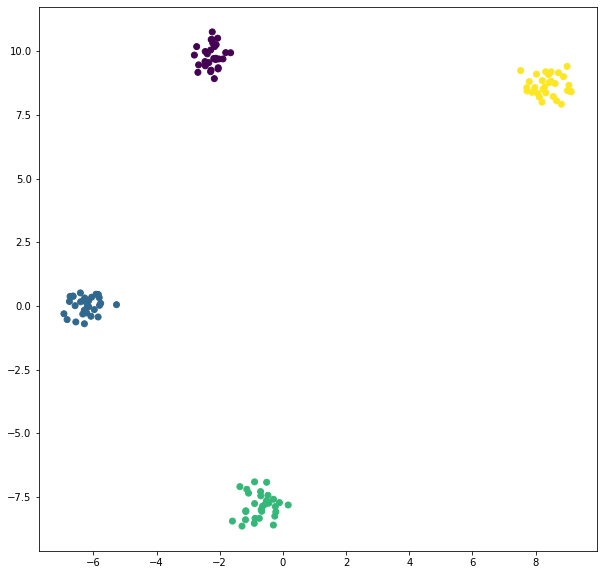

In [7]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=y)

*Ex. 5*

In [8]:
from sklearn.cluster import KMeans

In [9]:
k_means = KMeans(init='random', n_clusters=4)

In [10]:
k_means.fit(X)

KMeans(init='random', n_clusters=4)

In [11]:
y_pred = k_means.predict(X)

*Ex. 6*

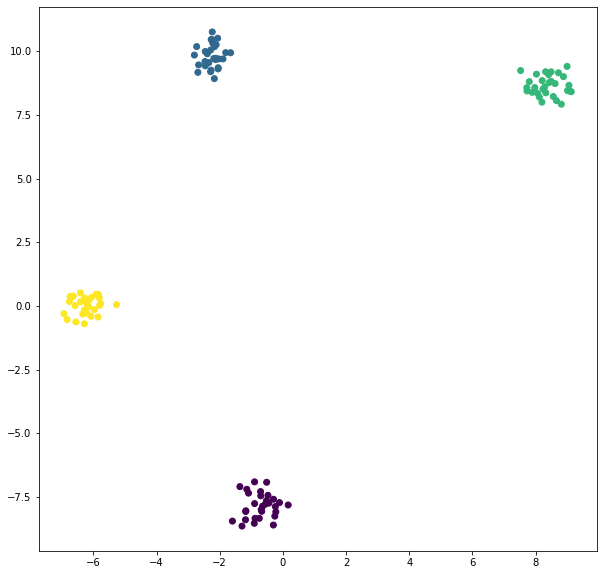

In [12]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)

*Ex. 7*

In [13]:
k_means.inertia_

37.809712589748834

In [14]:
# From jqmcvi

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di


In [15]:
import numpy as np

In [16]:
cluster0 = np.array([X[i] for i in range(len(k_means.labels_)) if k_means.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(k_means.labels_)) if k_means.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(k_means.labels_)) if k_means.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(k_means.labels_)) if k_means.labels_[i] == 3])

In [17]:
dunn([cluster0, cluster1, cluster2, cluster3])

4.252548441824639

## K-means clustering - example II

*Ex 1*

In [18]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=.8)

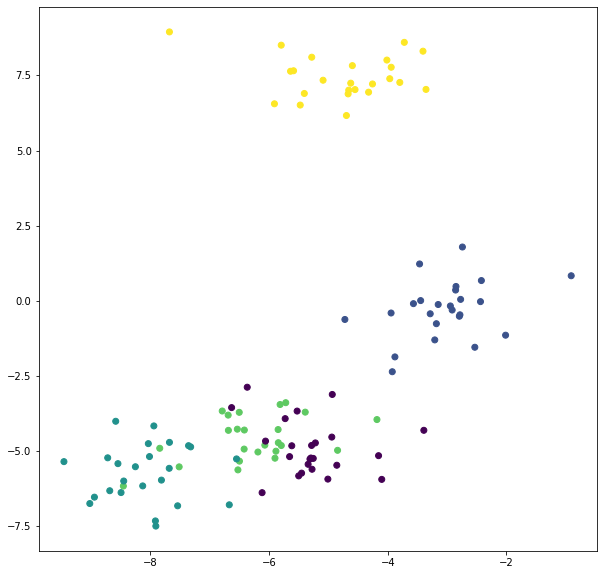

In [19]:
plt.figure(figsize=[10, 10])
plt.scatter(X[:,0], X[:,1], c=y)

*Ex. 2*

In [20]:
k_means5 = KMeans(init='random', n_clusters=5)

In [21]:
k_means5.fit(X)

KMeans(init='random', n_clusters=5)

In [22]:
y_pred5 = k_means5.predict(X)

In [23]:
k_means2 = KMeans(init='random', n_clusters=2)

In [24]:
k_means2.fit(X)
y_pred2 = k_means2.predict(X)

*Ex. 3*

In [25]:
k_means5.inertia_

132.08896950397252

In [26]:
cluster0 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 3])
cluster4 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 4])

In [27]:
dunn([cluster0, cluster1, cluster2, cluster3, cluster4])

0.037308220912127876

In [28]:
k_means2.inertia_

902.209373071775

In [29]:
cluster0 = np.array([X[i] for i in range(len(k_means2.labels_)) if k_means2.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(k_means2.labels_)) if k_means2.labels_[i] == 1])

In [30]:
dunn([cluster0, cluster1])

0.0824648077378098

## K-means ++

In [31]:
k_means5 = KMeans(n_clusters=5)

In [32]:
k_means5.fit(X)

KMeans(n_clusters=5)

In [33]:
y_pred5 = k_means5.predict(X)

In [34]:
k_means2 = KMeans(n_clusters=2)

In [35]:
k_means2.fit(X)
y_pred2 = k_means2.predict(X)

*Ex. 3*

In [36]:
k_means5.inertia_

130.65430168294336

In [37]:
cluster0 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 1])
cluster2 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 2])
cluster3 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 3])
cluster4 = np.array([X[i] for i in range(len(k_means5.labels_)) if k_means5.labels_[i] == 4])

In [38]:
dunn([cluster0, cluster1, cluster2, cluster3, cluster4])

0.09261645907878145

In [39]:
k_means2.inertia_

902.209373071775

In [40]:
cluster0 = np.array([X[i] for i in range(len(k_means2.labels_)) if k_means2.labels_[i] == 0])
cluster1 = np.array([X[i] for i in range(len(k_means2.labels_)) if k_means2.labels_[i] == 1])

In [41]:
dunn([cluster0, cluster1])

0.0824648077378098

## Elbow method

In [42]:
X, y = make_blobs(n_samples=120, centers=5, n_features=2, cluster_std=.4)

In [43]:
inertia = []
for k in range(2, 9):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    inertia.append(k_means.inertia_)

Text(0, 0.5, 'Inertia')

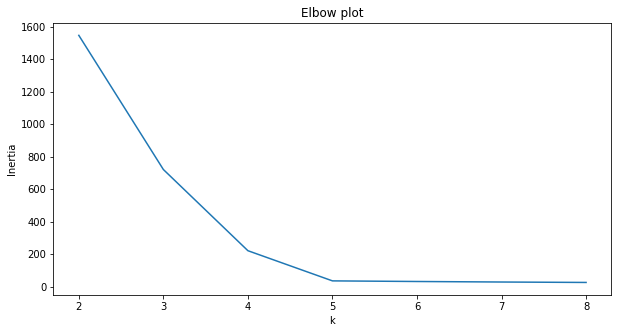

In [46]:
plt.figure(figsize=[10, 5])
plt.plot(range(2,9), inertia)
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Inertia')

## Ex

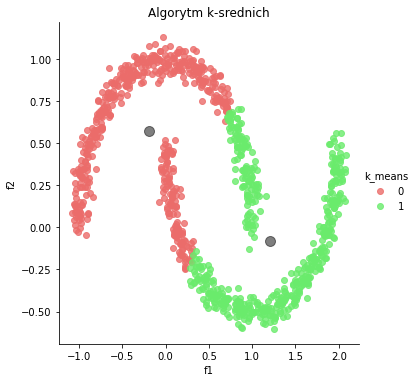

In [45]:
from sklearn.datasets.samples_generator import make_moons
import seaborn as sns
import pandas as pd

 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

#TODO: Kmeans
k_means = KMeans(n_clusters=2)
k_means.fit(x)
y_km = k_means.labels_
centers = k_means.cluster_centers_

#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()